In [1]:
import cv2
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os

In [2]:
rgb_path = "/Users/vedang/Downloads/rgbd-scenes 2/desk/desk_2/desk_2_76.png"
depth_path = "/Users/vedang/Downloads/rgbd-scenes 2/desk/desk_2/desk_2_76_depth.png"
mat_path = "/Users/vedang/Downloads/rgbd-scenes 2/desk/desk_2.mat"

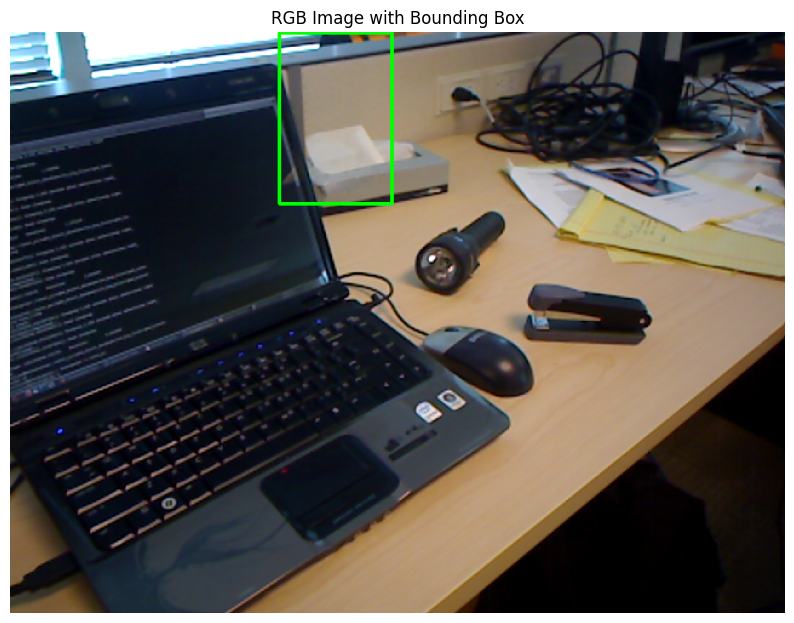

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Corrected paths
rgb_path = "/Users/vedang/Downloads/rgbd-scenes 2/desk/desk_2/desk_2_76.png"
depth_path = "/Users/vedang/Downloads/rgbd-scenes 2/desk/desk_2/desk_2_76_depth.png"
mat_path = "/Users/vedang/Downloads/rgbd-scenes 2/desk/desk_2.mat"

# Load images
rgb = cv2.imread(rgb_path)
depth = cv2.imread(depth_path, cv2.IMREAD_UNCHANGED)

if rgb is None:
    raise FileNotFoundError(f"RGB image not found at {rgb_path}")
if depth is None:
    raise FileNotFoundError(f"Depth image not found at {depth_path}")

# Convert BGR (OpenCV default) to RGB for matplotlib
rgb_display = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)

# Load bounding box data from .mat
mat = loadmat(mat_path)
bbox_data = mat['bboxes'][0][76]  # 76th frame

# Draw bounding boxes
for obj in bbox_data[0]:
    label = obj[0][0]
    y1 = int(obj[1][0][0])
    y2 = int(obj[2][0][0])
    x1 = int(obj[3][0][0])
    x2 = int(obj[4][0][0])
    
    cv2.rectangle(rgb_display, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(rgb_display, label, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Display in notebook
plt.figure(figsize=(10, 8))
plt.imshow(rgb_display)
plt.title("RGB Image with Bounding Box")
plt.axis("off")
plt.show()


In [4]:
mat = loadmat("/Users/vedang/Downloads/rgbd-scenes 2/desk/desk_2.mat")
bbox_entries = mat['bboxes'][0]

for idx, entry in enumerate(bbox_entries):
    if len(entry[0]) > 0:
        label = entry[0][0][0][0]  # get label string
        print(f"Index {idx} → Label: {label}")


Index 0 → Label: flashlight
Index 1 → Label: flashlight
Index 2 → Label: flashlight
Index 3 → Label: flashlight
Index 4 → Label: flashlight
Index 5 → Label: flashlight
Index 6 → Label: flashlight
Index 7 → Label: flashlight
Index 8 → Label: flashlight
Index 9 → Label: flashlight
Index 10 → Label: flashlight
Index 11 → Label: flashlight
Index 12 → Label: flashlight
Index 13 → Label: flashlight
Index 14 → Label: flashlight
Index 15 → Label: flashlight
Index 16 → Label: flashlight
Index 17 → Label: flashlight
Index 18 → Label: flashlight
Index 19 → Label: flashlight
Index 20 → Label: flashlight
Index 21 → Label: bowl
Index 22 → Label: bowl
Index 23 → Label: bowl
Index 24 → Label: bowl
Index 25 → Label: bowl
Index 26 → Label: bowl
Index 27 → Label: bowl
Index 28 → Label: bowl
Index 29 → Label: bowl
Index 30 → Label: bowl
Index 31 → Label: bowl
Index 32 → Label: bowl
Index 33 → Label: bowl
Index 34 → Label: bowl
Index 35 → Label: bowl
Index 36 → Label: bowl
Index 37 → Label: bowl
Index 38 →

In [5]:
import os

files = sorted(os.listdir("/Users/vedang/Downloads/rgbd-scenes 2/desk/desk_2"))
rgb_files = [f for f in files if f.endswith(".png") and "depth" not in f]
depth_files = [f for f in files if "depth" in f]

print("First 10 RGB files:", rgb_files[:10])
print("First 10 Depth files:", depth_files[:10])
print("Total RGB images:", len(rgb_files))
print("Total bounding boxes in .mat:", len(mat['bboxes'][0]))


First 10 RGB files: ['desk_2_1.png', 'desk_2_10.png', 'desk_2_100.png', 'desk_2_101.png', 'desk_2_102.png', 'desk_2_103.png', 'desk_2_104.png', 'desk_2_105.png', 'desk_2_106.png', 'desk_2_107.png']
First 10 Depth files: ['desk_2_100_depth.png', 'desk_2_101_depth.png', 'desk_2_102_depth.png', 'desk_2_103_depth.png', 'desk_2_104_depth.png', 'desk_2_105_depth.png', 'desk_2_106_depth.png', 'desk_2_107_depth.png', 'desk_2_108_depth.png', 'desk_2_109_depth.png']
Total RGB images: 190
Total bounding boxes in .mat: 190


In [ ]:
import open3d as o3d
import numpy as np
import cv2

# Load RGB and depth images
rgb_path = "/Users/vedang/Downloads/rgbd-scenes 2/desk/desk_2/desk_2_76.png"
depth_path = "/Users/vedang/Downloads/rgbd-scenes 2/desk/desk_2/desk_2_76_depth.png"

color_raw = o3d.io.read_image(rgb_path)
depth_raw = o3d.io.read_image(depth_path)

# Set depth scale (depends on camera, here assuming 1000 like in TUM dataset)
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw,
    depth_scale=1000.0,  # adjust if needed
    convert_rgb_to_intensity=False
)

# Camera intrinsics (dummy/fake values — replace with actual if known)
intrinsics = o3d.camera.PinholeCameraIntrinsic(
    width=640, height=480,
    fx=525.0, fy=525.0, cx=319.5, cy=239.5
)

# Create point cloud
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    intrinsics
)

# Flip for visualization (optional)
pcd.transform([[1, 0, 0, 0],
               [0, -1, 0, 0],
               [0, 0, -1, 0],
               [0, 0, 0, 1]])

# View
o3d.visualization.draw_geometries([pcd])


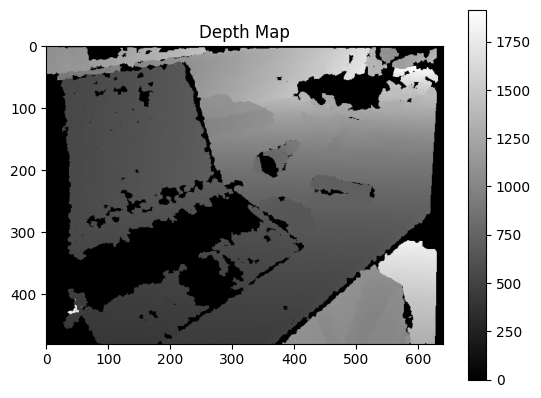

In [6]:
import matplotlib.pyplot as plt
import cv2

depth_raw_cv = cv2.imread(depth_path, -1)
plt.imshow(depth_raw_cv, cmap='gray')
plt.title("Depth Map")
plt.colorbar()
plt.show()



In [ ]:
# Optional: Downsample
pcd = pcd.voxel_down_sample(voxel_size=0.01)

# Optional: Remove statistical outliers
pcd, ind = pcd.remove_statistical_outlier(nb_neighbors=20, std_ratio=2.0)


NameError: name 'pcd' is not defined

In [ ]:
import open3d as o3d
import numpy as np
import cv2
import matplotlib.pyplot as plt

# === Step 1: Load RGB & Depth ===
rgb_path = "/Users/vedang/Downloads/rgbd-scenes 2/desk/desk_2/desk_2_76.png"
depth_path = "/Users/vedang/Downloads/rgbd-scenes 2/desk/desk_2/desk_2_76_depth.png"

color_raw = o3d.io.read_image(rgb_path)
depth_raw = o3d.io.read_image(depth_path)

# === Step 2: Create RGBD Image ===
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw,
    depth_scale=1000.0,
    depth_trunc=3.0,
    convert_rgb_to_intensity=False
)

# === Step 3: Camera Intrinsics (Assumed) ===
intrinsics = o3d.camera.PinholeCameraIntrinsic(
    width=640, height=480,
    fx=525.0, fy=525.0, cx=319.5, cy=239.5
)

# === Step 4: Generate Point Cloud ===
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    intrinsics
)

# Flip for right-hand view
pcd.transform([[1, 0, 0, 0],
               [0, -1, 0, 0],
               [0, 0, -1, 0],
               [0, 0, 0, 1]])

# === Step 5: Denoise & Downsample ===
pcd = pcd.voxel_down_sample(voxel_size=0.01)
pcd, _ = pcd.remove_statistical_outlier(nb_neighbors=20, std_ratio=2.0)

# === Step 6: Visualize ===
o3d.visualization.draw_geometries([pcd])


In [1]:
import open3d as o3d
import numpy as np
import os
import glob

# === Path Setup ===
base_path = "/Users/vedang/Downloads/rgbd-scenes 2/desk/desk_2"
output_dir = os.path.join(base_path, "pointclouds")
os.makedirs(output_dir, exist_ok=True)

# === Camera Intrinsics (Assumed) ===
intrinsics = o3d.camera.PinholeCameraIntrinsic(
    width=640, height=480,
    fx=525.0, fy=525.0, cx=319.5, cy=239.5
)

# === Fetch image pairs ===
rgb_images = sorted(glob.glob(os.path.join(base_path, "*.png")))
depth_images = [f for f in rgb_images if "_depth" in f]
rgb_images = [f for f in rgb_images if "_depth" not in f]

print(f"Found {len(rgb_images)} RGB and {len(depth_images)} depth images.")

for rgb_path in rgb_images:
    base_name = os.path.basename(rgb_path).replace(".png", "")
    depth_path = rgb_path.replace(".png", "_depth.png")

    if not os.path.exists(depth_path):
        print(f"[Skipping] No matching depth file for: {rgb_path}")
        continue

    print(f"Processing: {base_name}")

    # Load and build RGBD image
    color_raw = o3d.io.read_image(rgb_path)
    depth_raw = o3d.io.read_image(depth_path)

    rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
        color_raw, depth_raw,
        depth_scale=1000.0,
        depth_trunc=3.0,
        convert_rgb_to_intensity=False
    )

    # Create Point Cloud
    pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, intrinsics)
    pcd.transform([[1, 0, 0, 0],
                   [0, -1, 0, 0],
                   [0, 0, -1, 0],
                   [0, 0, 0, 1]])

    # Clean (optional)
    pcd = pcd.voxel_down_sample(voxel_size=0.01)
    pcd, _ = pcd.remove_statistical_outlier(nb_neighbors=20, std_ratio=2.0)

    # Save to file
    save_path = os.path.join(output_dir, f"{base_name}.ply")
    o3d.io.write_point_cloud(save_path, pcd)

print("\n✅ All point clouds processed and saved.")


Found 190 RGB and 190 depth images.
Processing: desk_2_1
Processing: desk_2_10
Processing: desk_2_100
Processing: desk_2_101
Processing: desk_2_102
Processing: desk_2_103
Processing: desk_2_104
Processing: desk_2_105
Processing: desk_2_106
Processing: desk_2_107
Processing: desk_2_108
Processing: desk_2_109
Processing: desk_2_11
Processing: desk_2_110
Processing: desk_2_111
Processing: desk_2_112
Processing: desk_2_113
Processing: desk_2_114
Processing: desk_2_115
Processing: desk_2_116
Processing: desk_2_117
Processing: desk_2_118
Processing: desk_2_119
Processing: desk_2_12
Processing: desk_2_120
Processing: desk_2_121
Processing: desk_2_122
Processing: desk_2_123
Processing: desk_2_124
Processing: desk_2_125
Processing: desk_2_126
Processing: desk_2_127
Processing: desk_2_128
Processing: desk_2_129
Processing: desk_2_13
Processing: desk_2_130
Processing: desk_2_131
Processing: desk_2_132
Processing: desk_2_133
Processing: desk_2_134
Processing: desk_2_135
Processing: desk_2_136
Proc

In [4]:
# Check type and structure of the bounding box at frame index 76
import scipy.io

mat_file = "/Users/vedang/Downloads/rgbd-scenes 2/desk/desk_2.mat"
mat = scipy.io.loadmat(mat_file)
bboxes = mat["bboxes"][0]

index = 76  # or any other frame index
print("Type of bboxes[index]:", type(bboxes[index]))
print("Length of bboxes[index]:", len(bboxes[index]))
print("Type of bboxes[index][0]:", type(bboxes[index][0]))
print("Length of bboxes[index][0]:", len(bboxes[index][0]))
print("bbox[index][0]:", bboxes[index][0])


Type of bboxes[index]: <class 'numpy.ndarray'>
Length of bboxes[index]: 1
Type of bboxes[index][0]: <class 'numpy.ndarray'>
Length of bboxes[index][0]: 1
bbox[index][0]: [(array(['flashlight'], dtype='<U10'), array([[1]], dtype=uint8), array([[142]], dtype=uint8), array([[222]], dtype=uint8), array([[315]], dtype=uint16), array([[399]], dtype=uint16))]


In [5]:
bbox_list = bboxes[index][0]  # could be 1 or many

for bbox in bbox_list:
    label = bbox[0][0]
    x1 = int(bbox[2][0][0])
    x2 = int(bbox[3][0][0])
    y1 = int(bbox[4][0][0])
    y2 = int(bbox[5][0][0])
    
    print(f"Object: {label} at ({x1},{y1}) → ({x2},{y2})")


Object: flashlight at (142,315) → (222,399)


In [8]:
print("Image shape:", img.shape)  # (height, width, channels)
print("Sample bbox:", x1, y1, x2, y2)


Image shape: (480, 640, 3)
Sample bbox: 142 315 222 399
